# Background

background information

# Data discription

data discription

# Pro-processing

Import the necessary methods

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Create the crime dateframe based on our date file. 

In [2]:
crime = pd.read_csv("Crime_data_from_2010_to_present.csv")

Check the column labels of the date file.

In [3]:
crime.columns.values

array(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2',
       'Crime Code 3', 'Crime Code 4', 'Address', 'Cross Street',
       'Location '], dtype=object)

Create the normalize function to help us normalize the date.

In [4]:
def datenormalize(string):
    string = string.replace('/','')
    return string

Normalize all the date information in the dateframe

In [5]:
crime['Date Reported'] = crime['Date Reported'].apply(datenormalize)
crime['Date Occurred'] = crime['Date Occurred'].apply(datenormalize)

In [6]:
crime['Crime Code Description'].value_counts()

BATTERY - SIMPLE ASSAULT                                    173280
BURGLARY FROM VEHICLE                                       147039
VEHICLE - STOLEN                                            146026
BURGLARY                                                    136156
THEFT PLAIN - PETTY ($950 & UNDER)                          135616
THEFT OF IDENTITY                                           117045
INTIMATE PARTNER - SIMPLE ASSAULT                           103455
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      97724
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     83513
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               82756
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              79144
ROBBERY                                                      76218
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     67138
CRIMINAL THREATS - NO WEAPON DISPLAYED                       52025
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     4

In [7]:
crime = crime.drop(columns = ['DR Number', 'Date Reported', 'Area ID', 'Reporting District', 'Crime Code', 'Premise Code', 'Premise Description', 'Weapon Used Code', 'MO Codes', 'Weapon Description', 'Status Code', 'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Cross Street', 'Address', 'Location '])



In [8]:
crime.columns

Index(['Date Occurred', 'Time Occurred', 'Area Name', 'Crime Code Description',
       'Victim Age', 'Victim Sex', 'Victim Descent'],
      dtype='object')

In [9]:
crime = crime.sort_values(by= ['Date Occurred'])

In [10]:
crime.shape

(1910587, 7)

In [11]:
crime = crime[pd.notnull(crime['Crime Code Description'])]
crime = crime[pd.notnull(crime['Area Name'])]

In [12]:
crime.shape

(1910587, 7)

# Data Visualization

#### Create the yearly crime visualization

In [13]:
def combine_year(string):
    if '2010' in string:
        string = '2010'
    elif '2011' in string:
        string = '2011'
    elif '2012' in string:
        string = '2012'
    elif '2013' in string:
        string = '2013'
    elif '2014' in string:
        string = '2014'
    elif '2015' in string:
        string = '2015'
    elif '2016' in string:
        string = '2016'
    elif '2017' in string:
        string = '2017'
    elif '2018' in string:
        string = '2018'
    elif '2019' in string:
        string = '2019'
    return string

In [14]:
temp_table = crime
temp_table['Date Occurred'] = temp_table['Date Occurred'].apply(combine_year)

In [15]:
temp_table.groupby(['Date Occurred', 'Crime Code Description']).size()

Date Occurred  Crime Code Description                                  
2010           ARSON                                                         331
               ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                  158
               ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               8349
               ATTEMPTED ROBBERY                                            1364
               BATTERY - SIMPLE ASSAULT                                    20521
               BATTERY ON A FIREFIGHTER                                       13
               BATTERY POLICE (SIMPLE)                                       460
               BATTERY WITH SEXUAL CONTACT                                  1044
               BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM        2
               BIGAMY                                                          2
               BIKE - STOLEN                                                 165
               BOAT - STOLEN         

In [16]:
crime_type = temp_table['Crime Code Description'].unique().tolist()

In [17]:
crime_type.append("YEAR")

In [18]:
yearly_crime = pd.DataFrame(columns = crime_type)

In [19]:
yearly_crime

,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),SEXUAL PENETRATION W/FOREIGN OBJECT,THEFT OF IDENTITY,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH,BATTERY - SIMPLE ASSAULT,BATTERY WITH SEXUAL CONTACT,"LETTERS, LEWD - TELEPHONE CALLS, LEWD","RAPE, FORCIBLE",ORAL COPULATION,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,DRUNK ROLL,GRAND THEFT / AUTO REPAIR,FAILURE TO DISPERSE,BLOCKING DOOR INDUCTION CENTER,FIREARMS RESTRAINING ORDER (FIREARMS RO),TRAIN WRECKING,"MANSLAUGHTER, NEGLIGENT",TILL TAP - ATTEMPT,DRUNK ROLL - ATTEMPT,YEAR


In [20]:
for i in range(0, 10):
    temp = temp_table[temp_table['Date Occurred'] == str(i + 2010)]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(str(i + 2010))
    yearly_crime.loc[i] = crime_count
    

In [21]:
yearly_crime

,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),SEXUAL PENETRATION W/FOREIGN OBJECT,THEFT OF IDENTITY,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH,BATTERY - SIMPLE ASSAULT,BATTERY WITH SEXUAL CONTACT,"LETTERS, LEWD - TELEPHONE CALLS, LEWD","RAPE, FORCIBLE",ORAL COPULATION,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,DRUNK ROLL,GRAND THEFT / AUTO REPAIR,FAILURE TO DISPERSE,BLOCKING DOOR INDUCTION CENTER,FIREARMS RESTRAINING ORDER (FIREARMS RO),TRAIN WRECKING,"MANSLAUGHTER, NEGLIGENT",TILL TAP - ATTEMPT,DRUNK ROLL - ATTEMPT,YEAR
0,1239,136,13179,132,20521,1044,2754,900,140,1087,...,4,1,0,0,0,0,1,2,1,2010
1,1160,129,13397,117,19905,1024,2594,818,120,844,...,0,3,5,0,0,0,0,0,0,2011
2,1171,162,15696,139,20478,1130,2619,983,174,987,...,1,2,2,0,0,0,0,0,0,2012
3,921,160,13078,103,18820,947,1988,831,143,831,...,3,2,3,0,0,0,0,0,0,2013
4,711,237,12395,142,18307,1085,1925,1001,183,799,...,0,2,6,0,0,0,0,0,0,2014
5,645,319,14530,161,17498,1065,1837,1140,188,798,...,9,1,2,0,0,0,1,0,0,2015
6,651,367,12891,168,17829,1127,1681,1171,236,939,...,2,0,0,2,0,1,1,0,0,2016
7,557,353,11842,162,18985,1276,1826,1180,201,911,...,8,1,0,1,1,1,1,1,0,2017
8,446,363,9508,152,19253,1239,1855,1041,161,952,...,4,1,2,0,1,0,1,0,0,2018
9,21,20,529,11,1684,87,127,62,13,61,...,0,0,0,0,0,0,0,0,0,2019


In [22]:
crime_type.pop()

'YEAR'

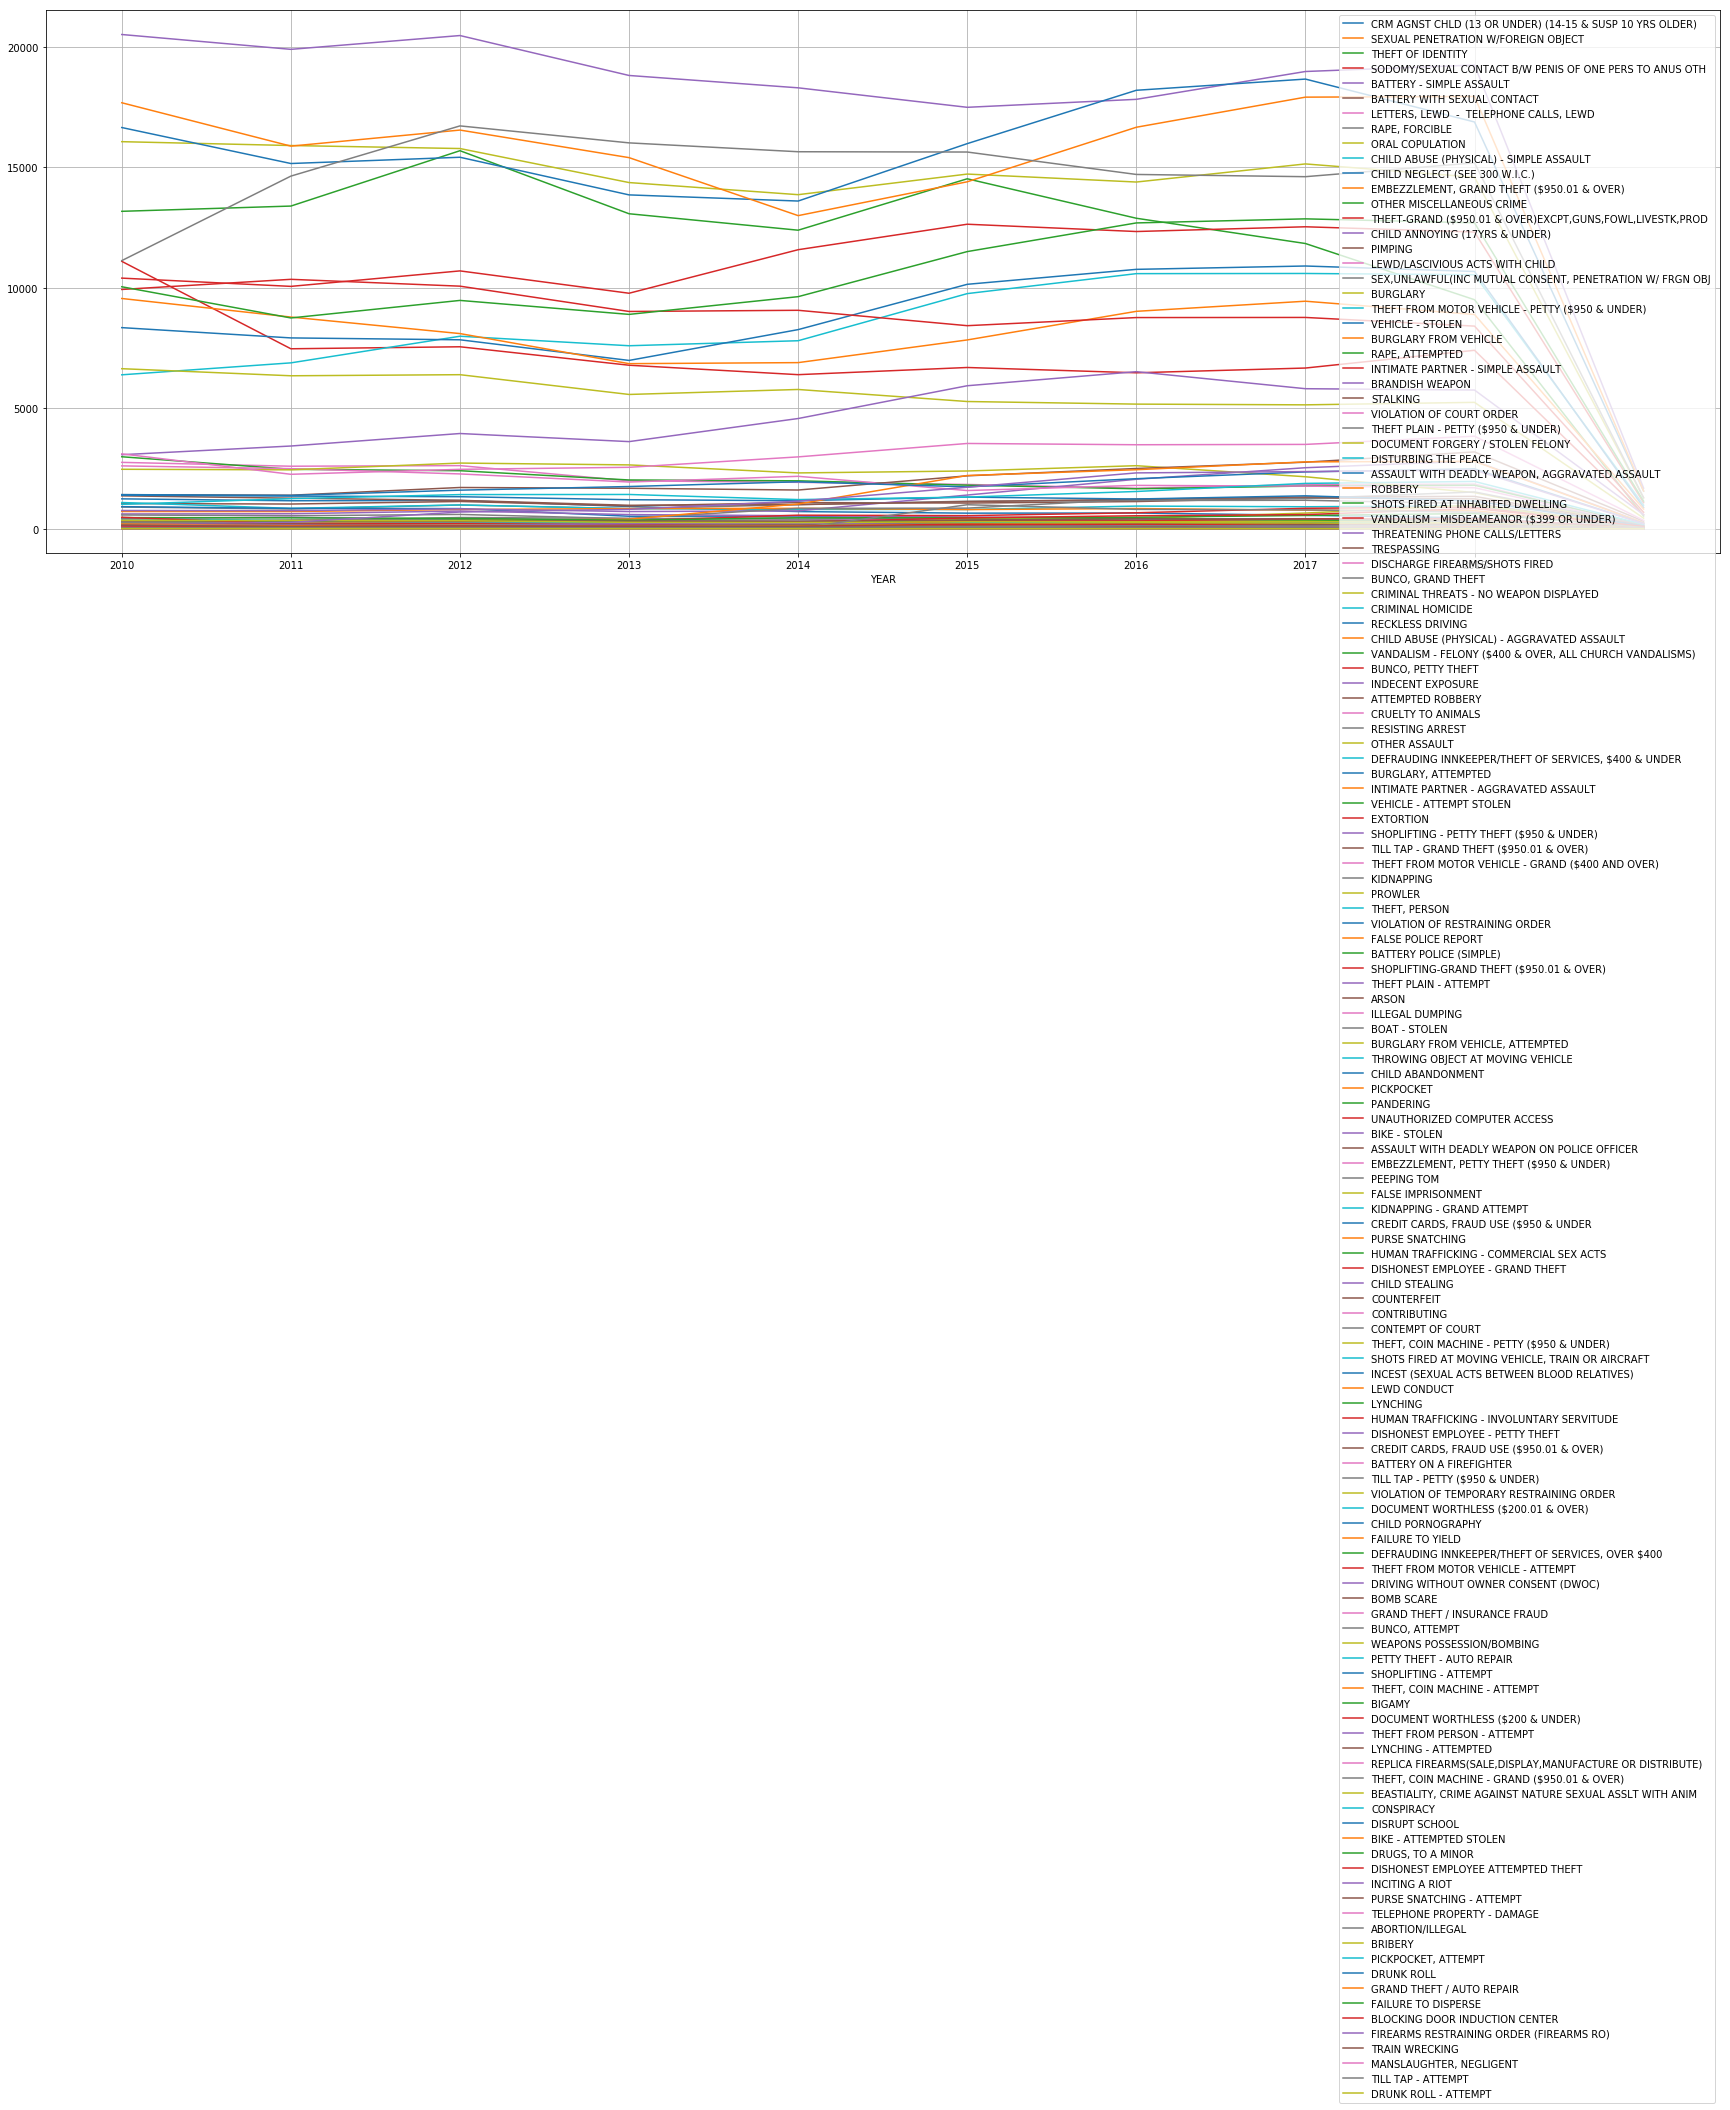

In [23]:
yearly_crime.plot(x='YEAR', y=crime_type, figsize=(30,10), xticks=(range(0,9)), grid=True)

#### Create the victim age visualization

In [24]:
age_crime = crime
age_crime = age_crime[pd.notnull(crime['Victim Age'])]

In [25]:
def group_age(string):
    if int(string) <= 10:
        string = '0 - 10'
    elif 10 < int(string) <= 20:
        string = '11 - 20'
    elif 20 < int(string) <= 30:
        string = '21 - 30'
    elif 30 < int(string) <= 40:
        string = '30 - 40'
    elif 40 < int(string) <= 50:
        string = '40 - 50'
    elif 50 < int(string) <= 60:
        string = '50 - 60'
    elif 60 < int(string) <= 70:
        string = '60 - 70'
    elif 70 < int(string) <= 80:
        string = '70 - 80'
    elif 80 < int(string) <= 90:
        string = '80 - 90'
    elif 90 < int(string) <= 100:
        string = '90 - 100'
    elif 100 < int(string):
        string = 'Above 100'
    return string

In [26]:
age_crime['Victim Age'] = age_crime['Victim Age'].apply(group_age)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
age_crime

,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent
1284098,2010,1,West Valley,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,0 - 10,F,B
1284176,2010,1200,Mission,SEXUAL PENETRATION W/FOREIGN OBJECT,0 - 10,F,H
1284173,2010,1200,Mission,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,0 - 10,F,H
1284172,2010,1200,Southeast,THEFT OF IDENTITY,21 - 30,M,B
1284170,2010,1,Southeast,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,0 - 10,M,B
1284168,2010,800,Southeast,SEXUAL PENETRATION W/FOREIGN OBJECT,0 - 10,F,B
1284167,2010,1200,Southeast,THEFT OF IDENTITY,60 - 70,M,B
1284164,2010,1230,Devonshire,BATTERY - SIMPLE ASSAULT,40 - 50,F,H
1284163,2010,1200,Devonshire,THEFT OF IDENTITY,50 - 60,F,W
1284159,2010,1600,Foothill,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,0 - 10,F,H


In [28]:
age_crime = age_crime.sort_values(by= ['Victim Age'])

In [29]:
age_crime.groupby(['Victim Age', 'Crime Code Description']).size()

Victim Age  Crime Code Description                                  
0 - 10      ARSON                                                          600
            ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                   677
            ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                1727
            ATTEMPTED ROBBERY                                              494
            BATTERY - SIMPLE ASSAULT                                      2571
            BATTERY ON A FIREFIGHTER                                        46
            BATTERY POLICE (SIMPLE)                                       1605
            BATTERY WITH SEXUAL CONTACT                                    271
            BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM         8
            BIKE - ATTEMPTED STOLEN                                          2
            BIKE - STOLEN                                                  115
            BLOCKING DOOR INDUCTION CENTER                    

In [30]:
crime_type.append("Victim Age")

In [31]:
victim_age_crime = pd.DataFrame(columns = crime_type)

In [32]:
victim_age_crime

,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),SEXUAL PENETRATION W/FOREIGN OBJECT,THEFT OF IDENTITY,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH,BATTERY - SIMPLE ASSAULT,BATTERY WITH SEXUAL CONTACT,"LETTERS, LEWD - TELEPHONE CALLS, LEWD","RAPE, FORCIBLE",ORAL COPULATION,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,DRUNK ROLL,GRAND THEFT / AUTO REPAIR,FAILURE TO DISPERSE,BLOCKING DOOR INDUCTION CENTER,FIREARMS RESTRAINING ORDER (FIREARMS RO),TRAIN WRECKING,"MANSLAUGHTER, NEGLIGENT",TILL TAP - ATTEMPT,DRUNK ROLL - ATTEMPT,Victim Age


In [38]:
age_group = age_crime['Victim Age'].unique().tolist()

In [39]:
for i in range(0, len(age_group)):
    temp = age_crime[age_crime['Victim Age'] == age_group[i]]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(age_group[i])
    victim_age_crime.loc[i] = crime_count

In [40]:
victim_age_crime

,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),SEXUAL PENETRATION W/FOREIGN OBJECT,THEFT OF IDENTITY,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH,BATTERY - SIMPLE ASSAULT,BATTERY WITH SEXUAL CONTACT,"LETTERS, LEWD - TELEPHONE CALLS, LEWD","RAPE, FORCIBLE",ORAL COPULATION,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,DRUNK ROLL,GRAND THEFT / AUTO REPAIR,FAILURE TO DISPERSE,BLOCKING DOOR INDUCTION CENTER,FIREARMS RESTRAINING ORDER (FIREARMS RO),TRAIN WRECKING,"MANSLAUGHTER, NEGLIGENT",TILL TAP - ATTEMPT,DRUNK ROLL - ATTEMPT,Victim Age
0,3247,194,1647,102,2571,271,334,192,173,3415,...,1,1,6,1,0,0,2,2,0,0 - 10
1,2819,435,3418,251,20910,2782,1439,2274,442,2990,...,3,0,3,0,0,0,1,0,0,11 - 20
2,32,399,17820,268,37831,2113,3959,2351,274,31,...,7,1,0,0,0,0,0,0,1,21 - 30
3,12,184,19890,152,26496,1060,3870,1005,109,22,...,3,2,1,0,0,0,0,0,0,30 - 40
4,10,103,19165,99,23468,729,2911,638,86,8,...,4,3,3,0,0,0,0,0,0,40 - 50
5,4,63,16696,41,17754,415,1817,302,50,1,...,1,2,0,0,0,0,0,0,0,50 - 60
6,2,18,10165,14,6806,131,799,70,13,1,...,2,0,1,1,0,0,0,0,0,60 - 70
7,0,14,4504,1,2025,62,326,14,4,1,...,0,0,1,0,0,0,0,0,0,70 - 80
8,1,13,1751,1,635,17,162,7,1,1,...,0,1,0,0,0,0,0,0,0,80 - 90
9,4,5,287,0,177,8,42,5,1,6,...,0,0,0,0,0,0,0,0,0,90 - 100


In [41]:
crime_type.pop()

'Victim Age'

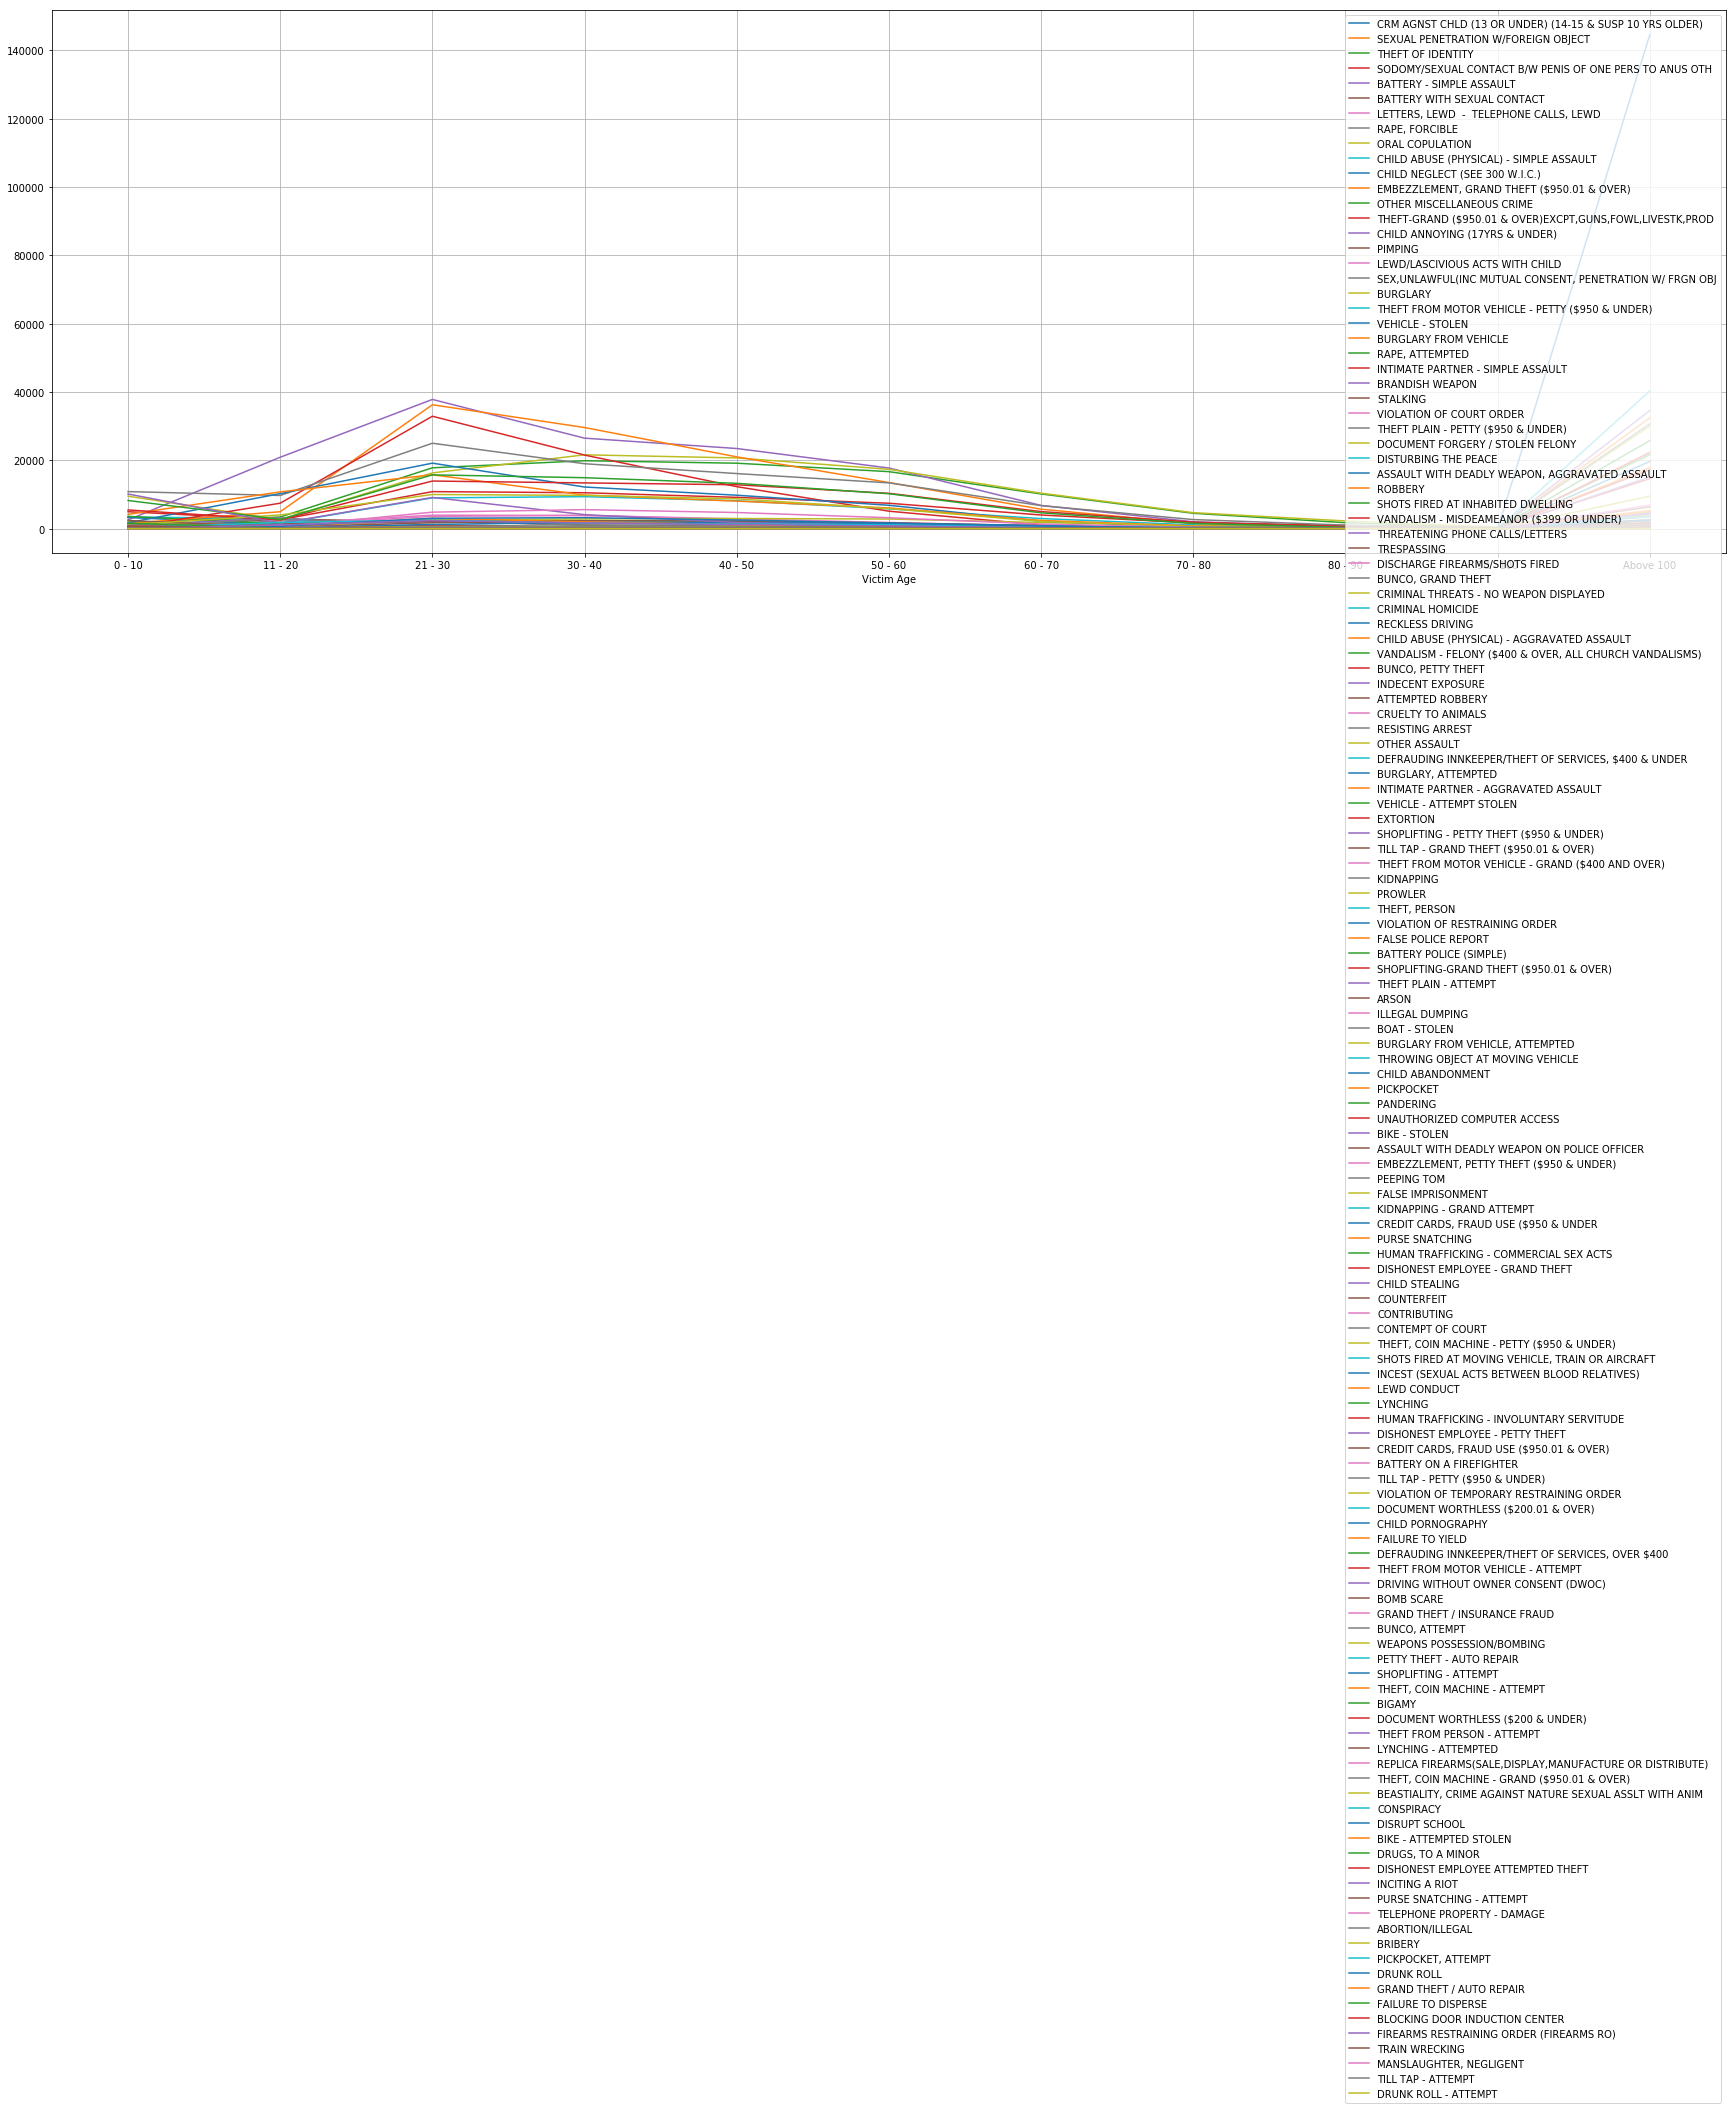

In [42]:
victim_age_crime.plot(x='Victim Age', y=crime_type, figsize=(30,10), xticks=(range(0,11)), grid=True)